In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
import warnings
warnings.simplefilter("ignore")

In [2]:
data=pd.read_csv("C:\\Users\\hp\\Documents\\cus_ana.csv")

In [3]:
data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,09-04-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,03-08-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,8/21/2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,02-10-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,1/19/2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,6/13/2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,06-10-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,1/25/2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,1/24/2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [5]:
df = data.drop(["Z_CostContact","Z_Revenue"], axis=1)
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,09-04-2012,58,635,...,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,03-08-2014,38,11,...,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,8/21/2013,26,426,...,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,02-10-2014,26,11,...,0,4,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293.0,1,0,1/19/2014,94,173,...,3,6,5,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,6/13/2013,46,709,...,3,4,5,0,0,0,0,0,0,0
2236,4001,1946,PhD,Together,64014.0,2,1,06-10-2014,56,406,...,2,5,7,0,0,0,1,0,0,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,1/25/2014,91,908,...,3,13,6,0,1,0,0,0,0,0
2238,8235,1956,Master,Together,69245.0,0,1,1/24/2014,8,428,...,5,10,3,0,0,0,0,0,0,0


In [6]:
df.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Response                 int64
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [8]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Response                0
dtype: int64

In [10]:
df['Income'] = df['Income'].replace(np.NaN, df['Income'].mean())


In [11]:
data1=df.drop_duplicates() 
data1.shape

(2240, 27)

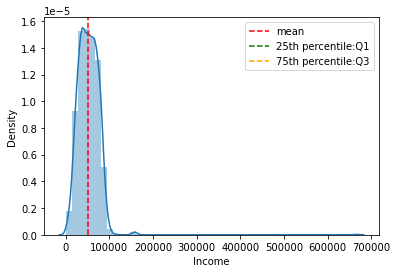

In [12]:
# Skewness
sns.distplot(data1['Income'])
plt.axvline(x=np.mean(data['Income']), c='red', ls='--', label='mean')
plt.axvline(x=np.percentile(data['Income'],25),c='green', ls='--', label = '25th percentile:Q1')
plt.axvline(x=np.percentile(data['Income'],75),c='orange', ls='--',label = '75th percentile:Q3' )
plt.legend()

<AxesSubplot:xlabel='NumWebVisitsMonth', ylabel='Density'>

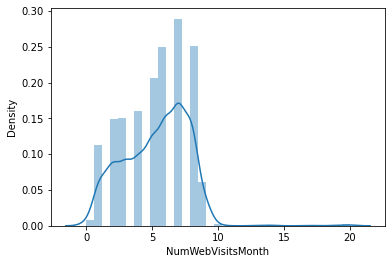

In [13]:
sns.distplot(data1["NumWebVisitsMonth"])

<AxesSubplot:>

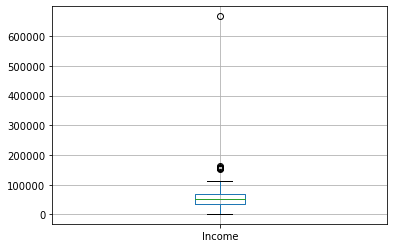

In [14]:
# Outliers
data1.boxplot(column=["Income"])

<AxesSubplot:>

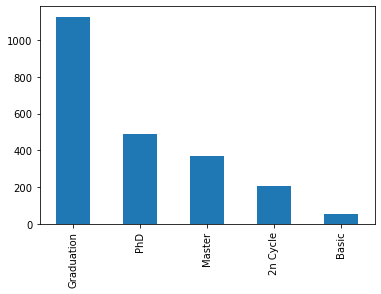

In [15]:
#Difference in education system
data1['Education'].value_counts().plot(kind='bar')

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

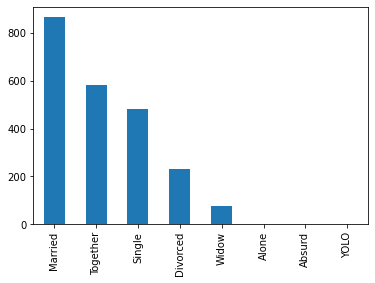

In [16]:
#Difference in marital status
data1['Marital_Status'].value_counts().plot(kind='bar')
data1['Marital_Status'].value_counts()

0    2096
1     144
Name: AcceptedCmp1, dtype: int64

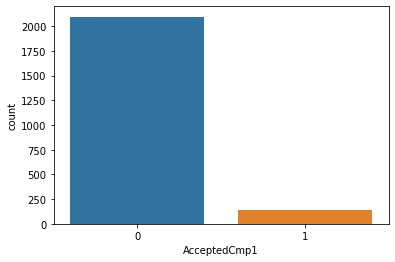

In [17]:
#Customer accepted the offer in 1st champ
sns.countplot(data1["AcceptedCmp1"])
data1['AcceptedCmp1'].value_counts()

0    2210
1      30
Name: AcceptedCmp2, dtype: int64

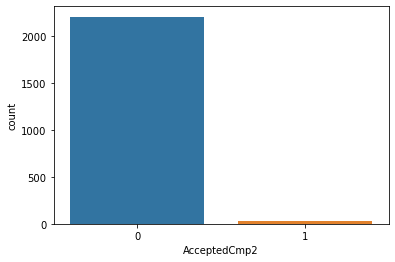

In [18]:
#Customer accepted the offer in the 2nd Champ
sns.countplot(data1["AcceptedCmp2"])
data1['AcceptedCmp2'].value_counts()

0    2077
1     163
Name: AcceptedCmp3, dtype: int64

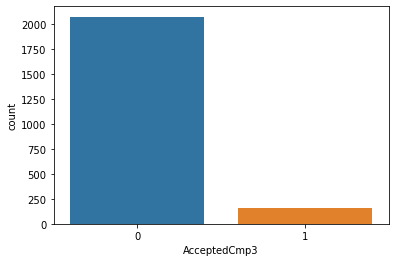

In [19]:
#Customer accepted the offer in 3rd Champ
sns.countplot(data1["AcceptedCmp3"])
data1['AcceptedCmp3'].value_counts()

0    2073
1     167
Name: AcceptedCmp4, dtype: int64

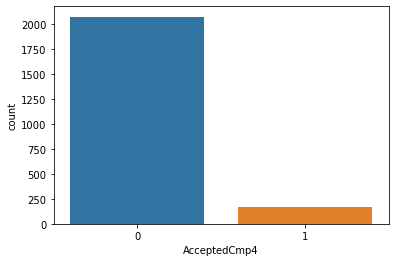

In [20]:
#Customer accepted the offer in 4th Champ
sns.countplot(data1["AcceptedCmp4"])
data1['AcceptedCmp4'].value_counts()

0    2077
1     163
Name: AcceptedCmp5, dtype: int64

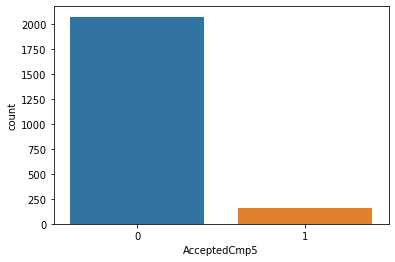

In [21]:
#Customer accepted the offer in the 5th Champ
sns.countplot(data1["AcceptedCmp5"])
data1['AcceptedCmp5'].value_counts()

<AxesSubplot:xlabel='Income', ylabel='Education'>

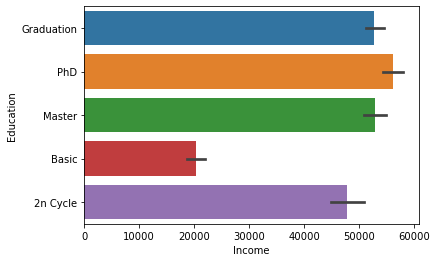

In [22]:
#Bi-Variate analysis
sns.barplot(x='Income', y="Education",  data=data1)

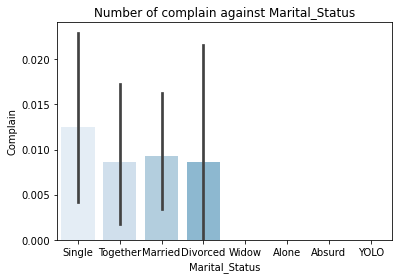

In [23]:
#Number of Complain with respect to marital status
#Creating bar plot
sns.barplot(x = 'Marital_Status',y = 'Complain',data = data1, palette = "Blues")
#Adding the aesthetics
plt.title('Number of complain against Marital_Status')
plt.xlabel('Marital_Status')
plt.ylabel('Complain') 
# Show the plot
plt.show()

<AxesSubplot:ylabel='Kidhome'>

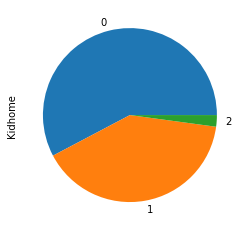

In [24]:
#No of kidhome
data1.Kidhome.value_counts().plot(kind="pie")

<AxesSubplot:ylabel='Teenhome'>

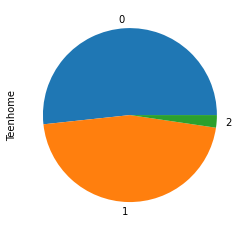

In [25]:
#No of Teenhome
data1.Teenhome.value_counts().plot(kind="pie")

<AxesSubplot:xlabel='Education', ylabel='Income'>

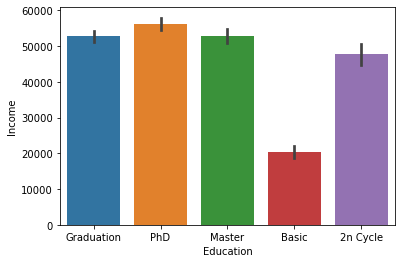

In [26]:
#Education with respect to income
sns.barplot(x='Education', y="Income",  data=data1)

<AxesSubplot:xlabel='Complain', ylabel='count'>

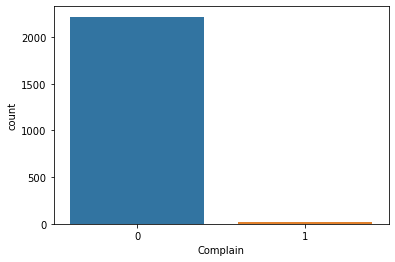

In [27]:
#No of Complain
sns.countplot(df['Complain'])

<AxesSubplot:xlabel='Kidhome', ylabel='MntWines'>

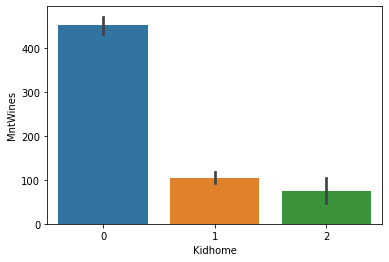

In [28]:
#Count of money spent on wine with respect to kidhome
sns.barplot(x='Kidhome', y="MntWines",  data=data1)

<AxesSubplot:xlabel='Teenhome', ylabel='MntWines'>

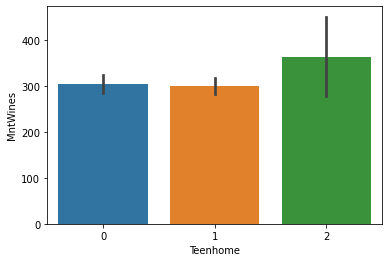

In [29]:
#Count of money spent on Wine with respect to Teenhome
sns.barplot(x='Teenhome', y="MntWines",  data=data1)

<AxesSubplot:xlabel='Kidhome', ylabel='MntFruits'>

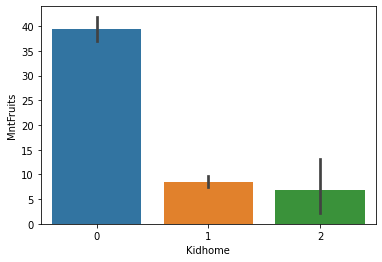

In [30]:
#count of money spent on fruits with respect to Kidhome
sns.barplot(x='Kidhome', y="MntFruits",  data=data1)
#Number of online purchases done based on customer's education

<AxesSubplot:xlabel='Kidhome', ylabel='MntFruits'>

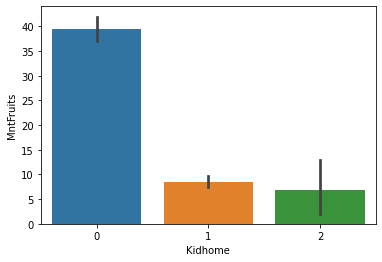

In [31]:
#count of money spent on fruits with respect to Teenhome
sns.barplot(x='Kidhome', y="MntFruits",  data=data1)
#Number of online purchases done based on customer's education

<AxesSubplot:xlabel='Education', ylabel='NumWebPurchases'>

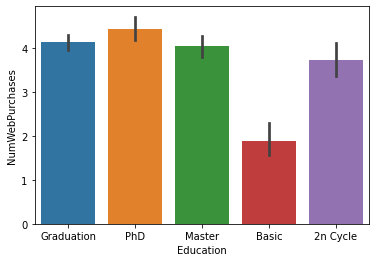

In [32]:
#Number of online purchases done based on customer's education
sns.barplot(x='Education', y="NumWebPurchases",  data=data1)

<AxesSubplot:xlabel='Education', ylabel='NumCatalogPurchases'>

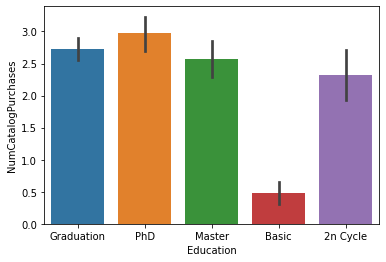

In [33]:
#Number of ofline purchases done based on customer's education
sns.barplot(x='Education', y="NumCatalogPurchases",  data=data1)

<AxesSubplot:xlabel='NumWebPurchases', ylabel='Income'>

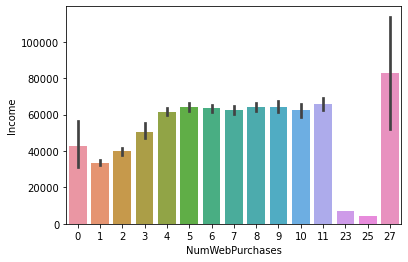

In [34]:
#Number of online purchases done based on customer's Income
sns.barplot(x='NumWebPurchases', y="Income",  data=data1)

<AxesSubplot:xlabel='NumCatalogPurchases', ylabel='Income'>

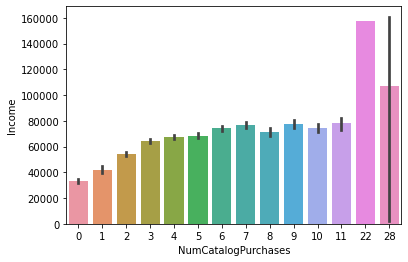

In [35]:
#Number of ofline purchases done based on customer's Income
sns.barplot(x='NumCatalogPurchases', y="Income",  data=data1)

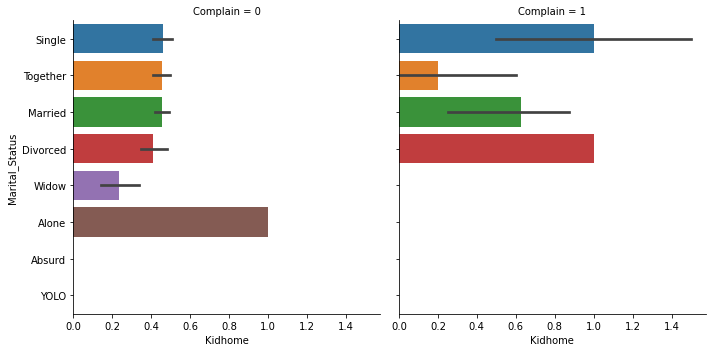

In [36]:
#Number of complain with marital status respect to kidhomes
sns.catplot(x='Kidhome', y='Marital_Status', col='Complain', data=data1, kind='bar')

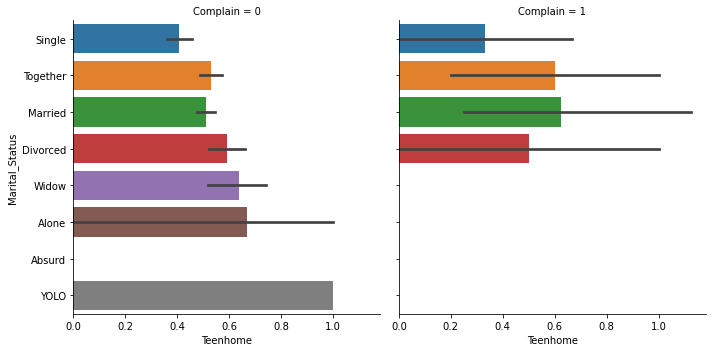

In [37]:
#Number of complain with marital status respect to Teenhome
sns.catplot(x='Teenhome', y='Marital_Status', col='Complain', data=data1, kind='bar')

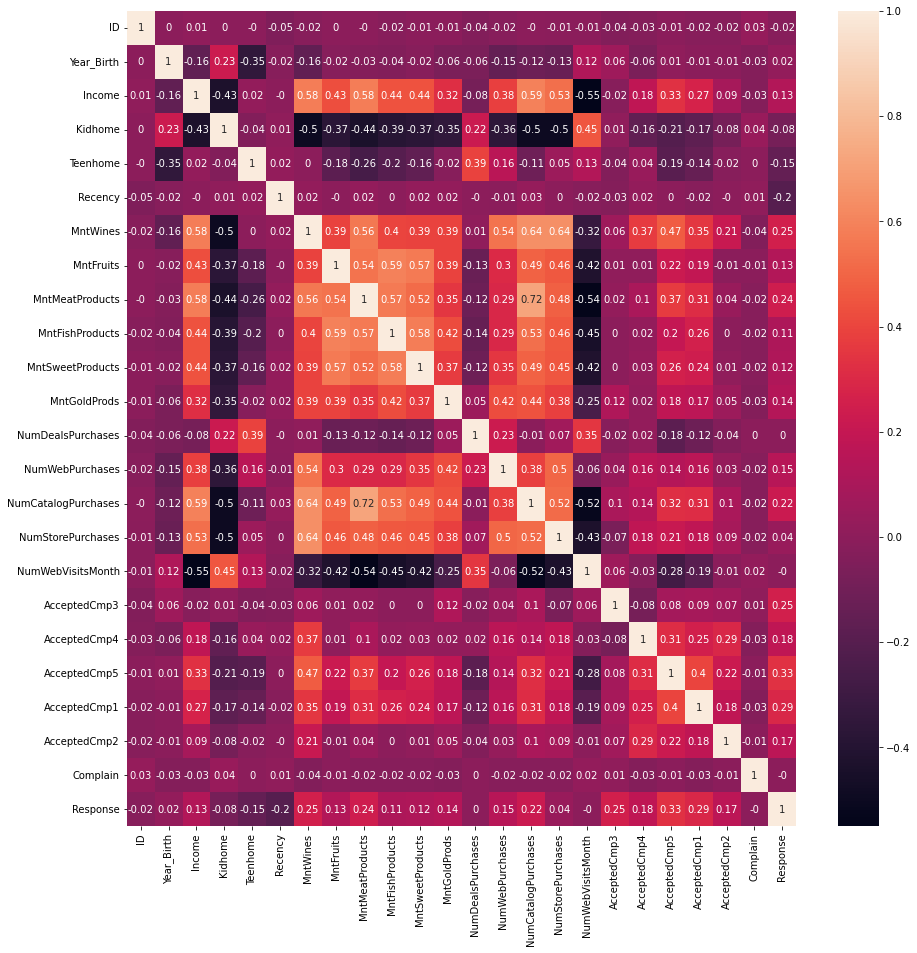

In [38]:
#Correlation analysis
plt.figure(figsize=(15,15))
sns.heatmap(np.round(data1.corr(),2), annot=True) 
plt.show()

## Scaling and Normilization 

In [39]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

In [40]:
data1['Education']= label_encoder.fit_transform(data1['Education'])
data1['Marital_Status']= label_encoder.fit_transform(data1['Marital_Status'])

In [41]:
data1=data1.drop("Dt_Customer", axis=1)

In [42]:
data1.head(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,2,4,58138.0,0,0,58,635,88,...,10,4,7,0,0,0,0,0,0,1
1,2174,1954,2,4,46344.0,1,1,38,11,1,...,1,2,5,0,0,0,0,0,0,0
2,4141,1965,2,5,71613.0,0,0,26,426,49,...,2,10,4,0,0,0,0,0,0,0
3,6182,1984,2,5,26646.0,1,0,26,11,4,...,0,4,6,0,0,0,0,0,0,0
4,5324,1981,4,3,58293.0,1,0,94,173,43,...,3,6,5,0,0,0,0,0,0,0
5,7446,1967,3,5,62513.0,0,1,16,520,42,...,4,10,6,0,0,0,0,0,0,0
6,965,1971,2,2,55635.0,0,1,34,235,65,...,3,7,6,0,0,0,0,0,0,0
7,6177,1985,4,3,33454.0,1,0,32,76,10,...,0,4,8,0,0,0,0,0,0,0
8,4855,1974,4,5,30351.0,1,0,19,14,0,...,0,2,9,0,0,0,0,0,0,1
9,5899,1950,4,5,5648.0,1,1,68,28,0,...,0,0,20,1,0,0,0,0,0,0


In [43]:
from sklearn.preprocessing import normalize
data_scaled = normalize(data1)
data_scaled = pd.DataFrame(data_scaled, columns=data1.columns)
data_scaled.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,0.094526,0.033488,0.000034,0.000068,0.994848,0.000000,0.000000,0.000992,0.010866,0.001506,...,0.000171,0.000068,0.000120,0.0,0.0,0.0,0.0,0.0,0.0,0.000017
1,0.046817,0.042079,0.000043,0.000086,0.998016,0.000022,0.000022,0.000818,0.000237,0.000022,...,0.000022,0.000043,0.000108,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2,0.057705,0.027383,0.000028,0.000070,0.997937,0.000000,0.000000,0.000362,0.005936,0.000683,...,0.000028,0.000139,0.000056,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3,0.225410,0.072341,0.000073,0.000182,0.971574,0.000036,0.000000,0.000948,0.000401,0.000146,...,0.000000,0.000146,0.000219,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
4,0.090900,0.033823,0.000068,0.000051,0.995277,0.000017,0.000000,0.001605,0.002954,0.000734,...,0.000051,0.000102,0.000085,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


## Agglomerative Clustering(Hierarchical Clustering)

In [44]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from matplotlib import pyplot as plt
import seaborn as sns

## Dendrogram with WARD Linkge

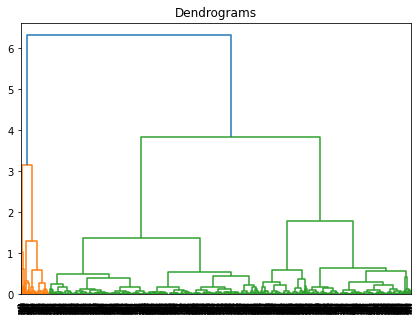

In [45]:
plt.figure(figsize=(7, 5))  
plt.title("Dendrograms")  
dend = sch.dendrogram(sch.linkage(data_scaled, method='ward'))

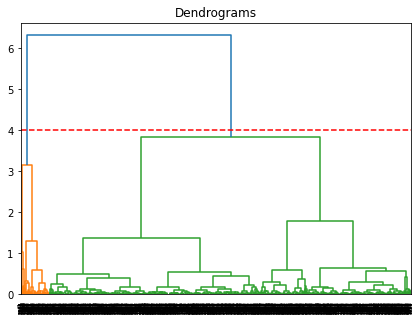

In [46]:
plt.figure(figsize=(7, 5))  
plt.title("Dendrograms")  
dend = sch.dendrogram(sch.linkage(data_scaled, method='ward'))
plt.axhline(y=4, color='r', linestyle='--')

##  Dendrogram with AVERAGE Linkge 

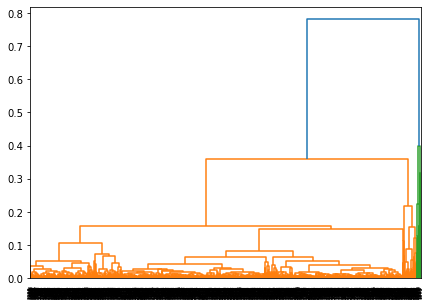

In [47]:
#create Dendrogram
plt.figure(figsize=(7, 5))  
dendrogram=sch.dendrogram(sch.linkage(data_scaled,method='average'))

## Dendrogram with COMPLETE Linkge 

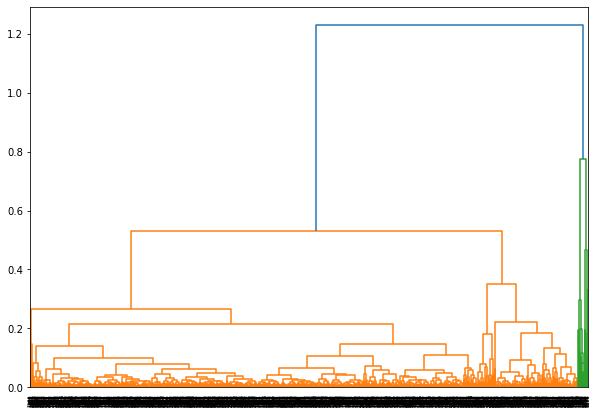

In [48]:
#create Dendrogram
plt.figure(figsize=(10, 7))  
dendrogram=sch.dendrogram(sch.linkage(data_scaled,method='complete'))

## Dendrogram with singke Linkage

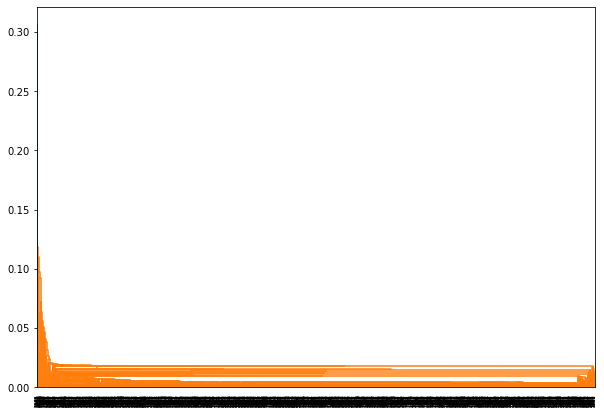

In [49]:
#create Dendrogram
plt.figure(figsize=(10, 7))  
dendrogram=sch.dendrogram(sch.linkage(data_scaled,method='single'))


## Dendrogram with CENTROID Linkge

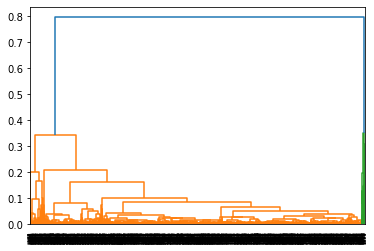

In [50]:
#create Dendrogram
dendrogram=sch.dendrogram(sch.linkage(data_scaled,method='centroid'))

In [51]:
hc=AgglomerativeClustering(n_clusters=4,affinity='euclidean',linkage="ward") 

In [52]:
y_hc=hc.fit_predict(data_scaled)
clusters=pd.DataFrame(y_hc,columns=['Clusters'])

In [53]:
clusters

,Clusters
0,2
1,2
2,2
3,0
4,2
...,...
2235,0
2236,2
2237,0
2238,0


In [54]:
df['Cluster_id']=hc.labels_

In [55]:
df.head(20)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Cluster_id
0,5524,1957,Graduation,Single,58138.000000,0,0,09-04-2012,58,635,...,4,7,0,0,0,0,0,0,1,2
1,2174,1954,Graduation,Single,46344.000000,1,1,03-08-2014,38,11,...,2,5,0,0,0,0,0,0,0,2
2,4141,1965,Graduation,Together,71613.000000,0,0,8/21/2013,26,426,...,10,4,0,0,0,0,0,0,0,2
3,6182,1984,Graduation,Together,26646.000000,1,0,02-10-2014,26,11,...,4,6,0,0,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293.000000,1,0,1/19/2014,94,173,...,6,5,0,0,0,0,0,0,0,2
5,7446,1967,Master,Together,62513.000000,0,1,09-09-2013,16,520,...,10,6,0,0,0,0,0,0,0,0
6,965,1971,Graduation,Divorced,55635.000000,0,1,11/13/2012,34,235,...,7,6,0,0,0,0,0,0,0,2
7,6177,1985,PhD,Married,33454.000000,1,0,05-08-2013,32,76,...,4,8,0,0,0,0,0,0,0,0
8,4855,1974,PhD,Together,30351.000000,1,0,06-06-2013,19,14,...,2,9,0,0,0,0,0,0,1,0
9,5899,1950,PhD,Together,5648.000000,1,1,3/13/2014,68,28,...,0,20,1,0,0,0,0,0,0,3


In [56]:
df.groupby("Cluster_id").agg(['mean']).reset_index()

,Cluster_id,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,...,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,7773.592635,1968.932106,45550.371421,0.560414,0.550058,48.049482,200.765247,18.588032,98.288838,...,1.804373,5.062140,5.817031,0.052934,0.048331,0.019563,0.018412,0.006904,0.010357,0.108170
1,1,9089.832168,1975.251748,22151.797203,0.804196,0.181818,49.174825,13.244755,4.517483,15.832168,...,0.363636,2.832168,7.041958,0.111888,0.000000,0.000000,0.000000,0.000000,0.020979,0.118881
2,2,3544.115257,1967.813433,61467.319459,0.316750,0.515755,49.967662,418.069652,34.791045,235.763682,...,3.568823,6.742952,4.677446,0.082919,0.103648,0.121061,0.106136,0.019900,0.007463,0.183250
3,3,8960.772727,1976.318182,6967.090909,0.500000,0.363636,43.500000,12.045455,7.272727,89.090909,...,1.772727,1.545455,9.363636,0.045455,0.000000,0.000000,0.000000,0.000000,0.000000,0.090909


In [57]:
label = hc.fit_predict(data_scaled)
print(label)

[2 2 2 ... 0 0 0]


## Getting centroid for AgglomerativeClustering 

In [58]:
!pip install scikit-learn --upgrade

In [59]:
from sklearn.neighbors import NearestCentroid
clf = NearestCentroid()
clf.fit(data_scaled, label)

NearestCentroid()

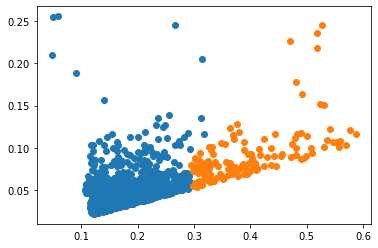

In [60]:
import matplotlib.pyplot as plt

#filter rows of original data
filtered_label0 = data_scaled[label == 0]
filtered_label1 = data_scaled[label == 1]


#plotting the results
plt.scatter(filtered_label0.iloc[:,0] , filtered_label0.iloc[:,1])
plt.scatter(filtered_label1.iloc[:,0] , filtered_label1.iloc[:,1])
plt.show()

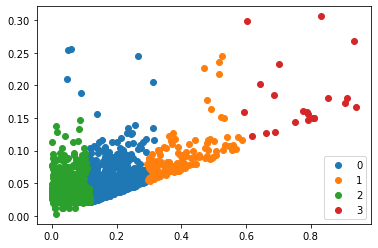

In [61]:
#Getting unique labels
 
u_labels1 = np.unique(label)
 
#plotting the results:
 
for i in u_labels1:
    plt.scatter(data_scaled.iloc[label == i , 0] , data_scaled.iloc[label == i , 1] , label = i)
plt.legend()
plt.show()

## centroid for all clusters 

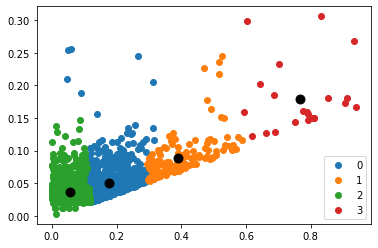

In [62]:
for i in u_labels1:
    plt.scatter(data_scaled.iloc[label == i , 0] , data_scaled.iloc[label == i , 1] , label = i)
plt.legend()
plt.scatter(clf.centroids_[:,0] , clf.centroids_[:,1] , s = 80, color = 'k')
plt.legend()
plt.show()

## K-Mean Clustring 

In [63]:
from sklearn.cluster import KMeans
from scipy .spatial.distance import cdist

## Elbow curve / Scree plot

In [64]:
#Importing required modules
 
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import numpy as np
 
#Load Data
#Load Data
data1 = load_digits().data
pca = PCA(2)
 
#Transform the data
df1 = pca.fit_transform(data1)
 
df1.shape

(1797, 2)

## DBscan Clustring

In [65]:
from sklearn.cluster import DBSCAN

In [66]:
data2=df

In [67]:
data2['Education']= label_encoder.fit_transform(data2['Education'])
data2['Marital_Status']= label_encoder.fit_transform(data2['Marital_Status'])

In [68]:
data2=data2.drop("Dt_Customer", axis=1)

In [69]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize 

In [70]:
#Scaling the data to bring all the attributes to a comparable level
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data2)

In [71]:
pca = PCA(n_components = 2)
X_principal = pca.fit_transform(X_scaled)
X_principal = pd.DataFrame(X_principal)
X_principal.columns = ['P1', 'P2']
print(X_principal.head())

         P1        P2
0  3.845929 -0.297378
1 -2.194092  0.322862
2  1.738884 -0.151646
3 -2.667460 -1.492754
4 -0.296501  0.084264


In [72]:
db_default = DBSCAN(eps=0.4, min_samples=5).fit(X_principal)
#predict the labels of clusters.
labels = db_default.fit_predict(X_principal)
print(labels)

[0 0 0 ... 0 0 0]


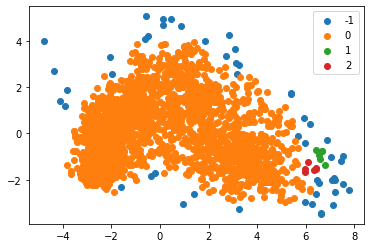

In [73]:
#Getting unique labels
 
u_labels = np.unique(labels)

X_principal=np.array(X_principal)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(X_principal[labels == i , 0] , X_principal[labels == i , 1] , label = i)
plt.legend()
plt.show()

## Getting centroid for DBScan

In [74]:
clf = NearestCentroid()
clf.fit(X_principal, labels)

NearestCentroid()

## Plotting the Cluster Centroids

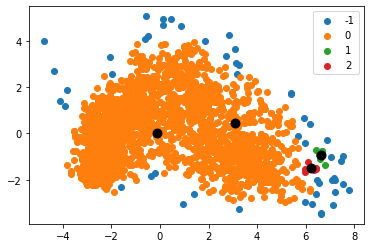

In [75]:
for i in u_labels:
    plt.scatter(X_principal[labels == i , 0] , X_principal[labels == i , 1] , label = i)
plt.legend()
plt.scatter(clf.centroids_[:,0] , clf.centroids_[:,1] , s = 80, color = 'k')
plt.legend()
plt.show()

In [109]:
data=df
data.head(50)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Cluster_id,Purchases,Expenses,Campaign
0,5524,1957,2,4,58138.000000,0,0,09-04-2012,58,635,...,0,0,0,0,0,1,2,25,1617,0
1,2174,1954,2,4,46344.000000,1,1,03-08-2014,38,11,...,0,0,0,0,0,0,2,6,27,0
2,4141,1965,2,5,71613.000000,0,0,8/21/2013,26,426,...,0,0,0,0,0,0,2,21,776,0
3,6182,1984,2,5,26646.000000,1,0,02-10-2014,26,11,...,0,0,0,0,0,0,0,8,53,0
4,5324,1981,4,3,58293.000000,1,0,1/19/2014,94,173,...,0,0,0,0,0,0,2,19,422,0
5,7446,1967,3,5,62513.000000,0,1,09-09-2013,16,520,...,0,0,0,0,0,0,0,22,716,0
6,965,1971,2,2,55635.000000,0,1,11/13/2012,34,235,...,0,0,0,0,0,0,2,21,590,0
7,6177,1985,4,3,33454.000000,1,0,05-08-2013,32,76,...,0,0,0,0,0,0,0,10,169,0
8,4855,1974,4,5,30351.000000,1,0,06-06-2013,19,14,...,0,0,0,0,0,1,0,6,46,0
9,5899,1950,4,5,5648.000000,1,1,3/13/2014,68,28,...,0,0,0,0,0,0,3,2,49,1


In [110]:
data['Purchases'] = data['NumDealsPurchases'] + data['NumWebPurchases'] + data['NumCatalogPurchases'] + data['NumStorePurchases']
data 

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Cluster_id,Purchases,Expenses,Campaign
0,5524,1957,2,4,58138.0,0,0,09-04-2012,58,635,...,0,0,0,0,0,1,2,25,1617,0
1,2174,1954,2,4,46344.0,1,1,03-08-2014,38,11,...,0,0,0,0,0,0,2,6,27,0
2,4141,1965,2,5,71613.0,0,0,8/21/2013,26,426,...,0,0,0,0,0,0,2,21,776,0
3,6182,1984,2,5,26646.0,1,0,02-10-2014,26,11,...,0,0,0,0,0,0,0,8,53,0
4,5324,1981,4,3,58293.0,1,0,1/19/2014,94,173,...,0,0,0,0,0,0,2,19,422,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,2,3,61223.0,0,1,6/13/2013,46,709,...,0,0,0,0,0,0,0,18,1341,0
2236,4001,1946,4,5,64014.0,2,1,06-10-2014,56,406,...,0,0,1,0,0,0,2,22,444,1
2237,7270,1981,2,2,56981.0,0,0,1/25/2014,91,908,...,1,0,0,0,0,0,0,19,1241,1
2238,8235,1956,3,5,69245.0,0,1,1/24/2014,8,428,...,0,0,0,0,0,0,0,23,843,0


In [111]:
data['Expenses'] = data['MntWines'] + data['MntFruits'] + data['MntMeatProducts'] + data['MntFishProducts'] + data['MntSweetProducts'] + data['MntGoldProds']
data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Cluster_id,Purchases,Expenses,Campaign
0,5524,1957,2,4,58138.0,0,0,09-04-2012,58,635,...,0,0,0,0,0,1,2,25,1617,0
1,2174,1954,2,4,46344.0,1,1,03-08-2014,38,11,...,0,0,0,0,0,0,2,6,27,0
2,4141,1965,2,5,71613.0,0,0,8/21/2013,26,426,...,0,0,0,0,0,0,2,21,776,0
3,6182,1984,2,5,26646.0,1,0,02-10-2014,26,11,...,0,0,0,0,0,0,0,8,53,0
4,5324,1981,4,3,58293.0,1,0,1/19/2014,94,173,...,0,0,0,0,0,0,2,19,422,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,2,3,61223.0,0,1,6/13/2013,46,709,...,0,0,0,0,0,0,0,18,1341,0
2236,4001,1946,4,5,64014.0,2,1,06-10-2014,56,406,...,0,0,1,0,0,0,2,22,444,1
2237,7270,1981,2,2,56981.0,0,0,1/25/2014,91,908,...,1,0,0,0,0,0,0,19,1241,1
2238,8235,1956,3,5,69245.0,0,1,1/24/2014,8,428,...,0,0,0,0,0,0,0,23,843,0


In [112]:
data['Campaign'] = data['AcceptedCmp1'] + data['AcceptedCmp2'] + data['AcceptedCmp3'] + data['AcceptedCmp4'] + data['AcceptedCmp5']
data.head(50)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Cluster_id,Purchases,Expenses,Campaign
0,5524,1957,2,4,58138.000000,0,0,09-04-2012,58,635,...,0,0,0,0,0,1,2,25,1617,0
1,2174,1954,2,4,46344.000000,1,1,03-08-2014,38,11,...,0,0,0,0,0,0,2,6,27,0
2,4141,1965,2,5,71613.000000,0,0,8/21/2013,26,426,...,0,0,0,0,0,0,2,21,776,0
3,6182,1984,2,5,26646.000000,1,0,02-10-2014,26,11,...,0,0,0,0,0,0,0,8,53,0
4,5324,1981,4,3,58293.000000,1,0,1/19/2014,94,173,...,0,0,0,0,0,0,2,19,422,0
5,7446,1967,3,5,62513.000000,0,1,09-09-2013,16,520,...,0,0,0,0,0,0,0,22,716,0
6,965,1971,2,2,55635.000000,0,1,11/13/2012,34,235,...,0,0,0,0,0,0,2,21,590,0
7,6177,1985,4,3,33454.000000,1,0,05-08-2013,32,76,...,0,0,0,0,0,0,0,10,169,0
8,4855,1974,4,5,30351.000000,1,0,06-06-2013,19,14,...,0,0,0,0,0,1,0,6,46,0
9,5899,1950,4,5,5648.000000,1,1,3/13/2014,68,28,...,0,0,0,0,0,0,3,2,49,1


In [113]:
data=data.drop("MntWines", axis=1)
data=data.drop("MntFruits", axis=1)
data=data.drop("MntMeatProducts", axis=1)
data=data.drop("MntFishProducts", axis=1)
data=data.drop("MntSweetProducts", axis=1)
data=data.drop("MntGoldProds", axis=1)
data=data.drop("AcceptedCmp1", axis=1)
data=data.drop("AcceptedCmp2", axis=1)
data=data.drop("AcceptedCmp3", axis=1)
data=data.drop("AcceptedCmp4", axis=1)
data=data.drop("AcceptedCmp5", axis=1)
data=data.drop("ID", axis=1)
data=data.drop("Year_Birth", axis=1)

In [114]:
data

,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Cluster_id,Purchases,Expenses,Campaign
0,2,4,58138.0,0,0,09-04-2012,58,3,8,10,4,7,0,1,2,25,1617,0
1,2,4,46344.0,1,1,03-08-2014,38,2,1,1,2,5,0,0,2,6,27,0
2,2,5,71613.0,0,0,8/21/2013,26,1,8,2,10,4,0,0,2,21,776,0
3,2,5,26646.0,1,0,02-10-2014,26,2,2,0,4,6,0,0,0,8,53,0
4,4,3,58293.0,1,0,1/19/2014,94,5,5,3,6,5,0,0,2,19,422,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,2,3,61223.0,0,1,6/13/2013,46,2,9,3,4,5,0,0,0,18,1341,0
2236,4,5,64014.0,2,1,06-10-2014,56,7,8,2,5,7,0,0,2,22,444,1
2237,2,2,56981.0,0,0,1/25/2014,91,1,2,3,13,6,0,0,0,19,1241,1
2238,3,5,69245.0,0,1,1/24/2014,8,2,6,5,10,3,0,0,0,23,843,0


In [115]:
data=data.drop("NumStorePurchases", axis=1)
data=data.drop("Dt_Customer", axis=1)

In [116]:
data['Income'] = data['Income'].replace(np.NaN, data['Income'].mean())
data=data.assign(Incomes=pd.cut(data['Income'], 
                               bins=[ 0, 25000, 50000,100000,666666], 
                               labels=['Below 25000', 'Income 25000-50000 ', 'Income 50000-100000 ','Above 100000']))
data=data.drop("Income", axis=1)

In [117]:
data['Expenses'] = data['Expenses'].replace(np.NaN, data['Expenses'].mean())
data=data.assign(Expense=pd.cut(data['Expenses'], 
                               bins=[ 0, 500, 1000, 2525], 
                               labels=['Below 500', 'Expense 500-1000 ','Above 1000']))
data=data.drop("Expenses", axis=1)

In [118]:
data['Marital_Status'] = data['Marital_Status'].replace(['Married', 'Together'], 'relationship')
data['Marital_Status'] = data['Marital_Status'].replace(['Single', 'Divorced', 'Widow', 'Alone', 'Absurd', 'YOLO'], 'single')

data['Education'] = data['Education'].replace(['2n Cycle', 'Basic'], 'Basic')
data['Education'] = data['Education'].replace(['Graduation', 'Master'], 'Graduated')
data['Education'] = data['Education'].replace(['PhD'], 'PHD')

In [119]:
data.head(5)

,Education,Marital_Status,Kidhome,Teenhome,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumWebVisitsMonth,Complain,Response,Cluster_id,Purchases,Campaign,Incomes,Expense
0,2,4,0,0,58,3,8,10,7,0,1,2,25,0,Income 50000-100000,Above 1000
1,2,4,1,1,38,2,1,1,5,0,0,2,6,0,Income 25000-50000,Below 500
2,2,5,0,0,26,1,8,2,4,0,0,2,21,0,Income 50000-100000,Expense 500-1000
3,2,5,1,0,26,2,2,0,6,0,0,0,8,0,Income 25000-50000,Below 500
4,4,3,1,0,94,5,5,3,5,0,0,2,19,0,Income 50000-100000,Below 500


In [120]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

In [121]:
data['Education']= label_encoder.fit_transform(data['Education'])
data['Marital_Status']= label_encoder.fit_transform(data['Marital_Status'])
data['Incomes']= label_encoder.fit_transform(data['Incomes'])
data['Expense']= label_encoder.fit_transform(data['Expense'])

In [122]:
data.head(5)

,Education,Marital_Status,Kidhome,Teenhome,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumWebVisitsMonth,Complain,Response,Cluster_id,Purchases,Campaign,Incomes,Expense
0,2,4,0,0,58,3,8,10,7,0,1,2,25,0,3,0
1,2,4,1,1,38,2,1,1,5,0,0,2,6,0,2,1
2,2,5,0,0,26,1,8,2,4,0,0,2,21,0,3,2
3,2,5,1,0,26,2,2,0,6,0,0,0,8,0,2,1
4,4,3,1,0,94,5,5,3,5,0,0,2,19,0,3,1


In [123]:
from sklearn.preprocessing import normalize
data_scaled = normalize(data)
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)
data_scaled.head()

,Education,Marital_Status,Kidhome,Teenhome,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumWebVisitsMonth,Complain,Response,Cluster_id,Purchases,Campaign,Incomes,Expense
0,0.030697,0.061393,0.000000,0.000000,0.890203,0.046045,0.122787,0.153483,0.107438,0.0,0.015348,0.030697,0.383708,0.0,0.046045,0.000000
1,0.050932,0.101863,0.025466,0.025466,0.967701,0.050932,0.025466,0.025466,0.127329,0.0,0.000000,0.050932,0.152795,0.0,0.050932,0.025466
2,0.056614,0.141535,0.000000,0.000000,0.735980,0.028307,0.226455,0.056614,0.113228,0.0,0.000000,0.056614,0.594445,0.0,0.084921,0.056614
3,0.069886,0.174714,0.034943,0.000000,0.908514,0.069886,0.069886,0.000000,0.209657,0.0,0.000000,0.000000,0.279543,0.0,0.069886,0.034943
4,0.041431,0.031073,0.010358,0.000000,0.973636,0.051789,0.051789,0.031073,0.051789,0.0,0.000000,0.020716,0.196799,0.0,0.031073,0.010358


In [124]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [125]:
hc=AgglomerativeClustering(n_clusters=4,affinity='euclidean',linkage="ward") 

In [126]:
y_hc=hc.fit_predict(data_scaled)
clusters=pd.DataFrame(y_hc,columns=['Clusters'])

In [127]:
data['Cluster_id']=hc.labels_

In [128]:
data.groupby("Cluster_id").agg(['mean']).reset_index()

,Cluster_id,Education,Marital_Status,Kidhome,Teenhome,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumWebVisitsMonth,Complain,Response,Purchases,Campaign,Incomes,Expense
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,2.334495,3.757840,0.336237,0.503484,32.327526,2.543554,4.918118,3.437282,5.315331,0.012195,0.210801,17.538328,0.398955,2.541812,0.879791
1,1,2.601449,3.699275,0.170290,0.536232,10.086957,2.804348,6.003623,4.601449,4.362319,0.003623,0.326087,21.492754,0.481884,2.811594,0.771739
2,2,2.384557,3.714067,0.527523,0.501529,67.561927,2.151376,3.441896,2.048165,5.429664,0.009939,0.076453,12.742355,0.230122,2.289755,0.940367
3,3,2.256098,3.890244,0.792683,0.500000,3.585366,1.951220,2.048780,0.500000,6.731707,0.000000,0.280488,7.621951,0.048780,1.817073,1.000000


In [129]:
data

,Education,Marital_Status,Kidhome,Teenhome,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumWebVisitsMonth,Complain,Response,Cluster_id,Purchases,Campaign,Incomes,Expense
0,2,4,0,0,58,3,8,10,7,0,1,0,25,0,3,0
1,2,4,1,1,38,2,1,1,5,0,0,2,6,0,2,1
2,2,5,0,0,26,1,8,2,4,0,0,0,21,0,3,2
3,2,5,1,0,26,2,2,0,6,0,0,2,8,0,2,1
4,4,3,1,0,94,5,5,3,5,0,0,2,19,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,2,3,0,1,46,2,9,3,5,0,0,0,18,0,3,0
2236,4,5,2,1,56,7,8,2,7,0,0,0,22,1,3,1
2237,2,2,0,0,91,1,2,3,6,0,0,2,19,1,3,0
2238,3,5,0,1,8,2,6,5,3,0,0,1,23,0,3,2


In [137]:
X = data.drop("Cluster_id", axis=1)
y = data.Cluster_id
X.shape, y.shape

((2240, 15), (2240,))

In [131]:
from sklearn.model_selection import train_test_split
x_train, x_cv, y_train, y_cv = train_test_split(X,y, test_size = 0.2, random_state = 10)

In [132]:
from sklearn.ensemble import RandomForestClassifier 
model = RandomForestClassifier(max_depth=4, random_state = 10) 
model.fit(x_train, y_train)

RandomForestClassifier(max_depth=4, random_state=10)

In [133]:
from sklearn.metrics import accuracy_score
pred_cv = model.predict(x_cv)
accuracy_score(y_cv,pred_cv)

0.8482142857142857

In [134]:
pred_train = model.predict(x_train)
accuracy_score(y_train,pred_train)

0.8850446428571429

In [135]:
# saving the model 
import pickle 
pickle_out = open("classifier.pkl", mode = "wb") 
pickle.dump(model, pickle_out) 
pickle_out.close()